In [1]:
#format the book
%matplotlib inline
from __future__ import division, print_function
import matplotlib.pyplot as plt
import book_format
book_format.load_style(name='/custom3.css')

E:\Jupyter\Anaconda2\lib\site-packages\matplotlib\__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Kalman Filter (cont'd)

## Positioning: Measurement + Motion

* Measurement: Production followed by normalization

  Bayes's rule

  $P(x|Z)=\frac{P(Z|x)P(x)}{P(Z)}$

  x=cell

  Z=measurement

  $P(x|Z)=$ probability of cell after measurment

  $P(x)=$ probability of cell before measurment

  $P(Z|x)=$ probability of measurment on the condition of cell

  $P(Z)=\sum P(Z|x)P(x)$ total probability of making measurement "Z"

* Motion: Convolution
  
  Theorem of Total Probability
  
  $P(x_i^{t})=\sum_jP(x_j^{t-1})P(x_i|x_j)$
  
  $P(x_i|x_j)=$probability of motion from cell $x_j$ to cell $x_i$

## Kalman Filter Localization

* Monte Carlo Localization: multi-modal
* Kalman Filter Localization: uni-modal, Gassian distritution $X\ \sim\ \mathcal{N}(\mu,\,\sigma^2)$
$$f(x, \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi} } e^{ -\frac{(x-\mu)^2}{2\sigma^2} }$$

Gassian distritution examples: 

$f(x, -1, 1), \, f(x, 0, 2), \, f(x, 2, 3)$

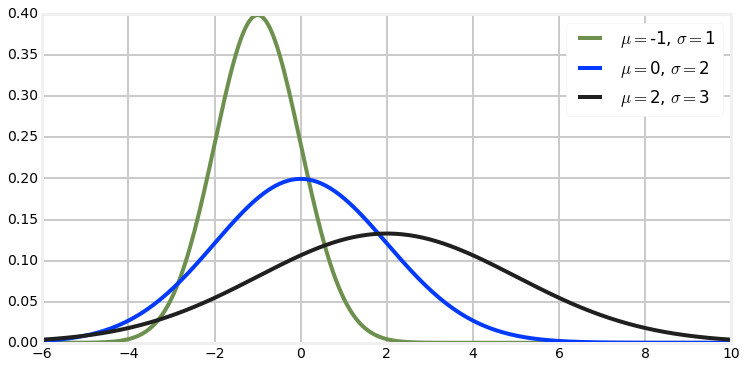

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#Numerical python functions written for compatability 
#with MATLAB commands with the same names.
import matplotlib.mlab as mlab
import math

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / 2 / np.power(sig, 2.))/sig/math.sqrt(2*math.pi)

x = np.linspace(-6, 10, 300)
for mu, sig in [(-1, 1), (0, 2), (2, 3)]:
    plt.plot(x, gaussian(x, mu, sig), label='$\mu=$%d, $\sigma=$%d' % (mu, sig))
    #plt.plot(x, mlab.normpdf(x, mu, sig), label='$\mu=$%d, $\sigma=$%d' % (mu, sig))
plt.legend()
plt.show()

* The measurement cycle is usually referred to as a **measurement update**
* The motion cycle is usually called **prediction**
* The measurement update will use **Bayes Rule** - a product, multiplication
* The prediction update will use **Total Probability** - a convolution, an addition.

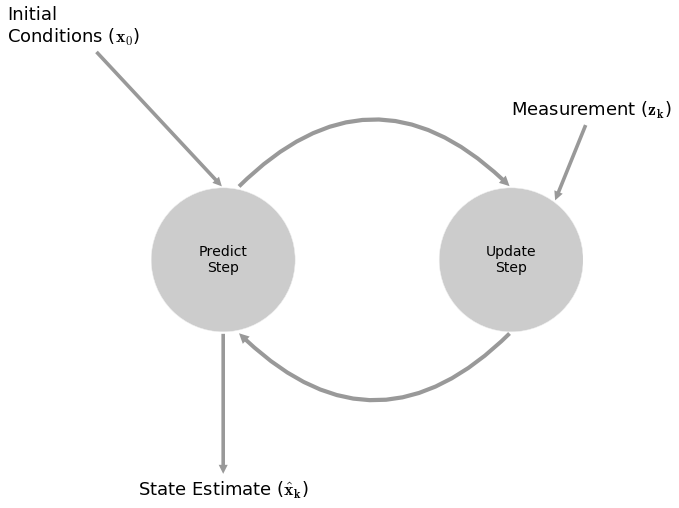

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle#, Rectangle, Polygon, Arrow, FancyArrow

box_bg = '#CCCCCC'
arrow1 = '#88CCFF'
arrow2 = '#88FF88'

plt.figure(figsize=(6,6), facecolor='w')
ax = plt.axes((0, 0, 1, 1),
              xticks=[], yticks=[], frameon=False)
#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)


pc = Circle((4,5), 0.5, fc=box_bg)
uc = Circle((6,5), 0.5, fc=box_bg)
ax.add_patch (pc)
ax.add_patch (uc)


plt.text(4,5, "Predict\nStep",
         ha='center', va='center', fontsize=14)
plt.text(6,5, "Update\nStep",
         ha='center', va='center', fontsize=14)

#btm
ax.annotate('',
            xy=(4.1, 4.5),  xycoords='data',
            xytext=(6, 4.5), textcoords='data',
            size=20,
            arrowprops=dict(arrowstyle="simple",
                            fc="0.6", ec="none",
                            patchB=pc,
                            patchA=uc,
                            connectionstyle="arc3,rad=-0.5"))
#top
ax.annotate('',
            xy=(6, 5.5),  xycoords='data',
            xytext=(4.1, 5.5), textcoords='data',
            size=20,
            arrowprops=dict(arrowstyle="simple",
                            fc="0.6", ec="none",
                            patchB=uc,
                            patchA=pc,
                            connectionstyle="arc3,rad=-0.5"))


ax.annotate('Measurement ($\mathbf{z_k}$)',
            xy=(6.3, 5.4),  xycoords='data',
            xytext=(6,6), textcoords='data',
            size=18,
            arrowprops=dict(arrowstyle="simple",
                            fc="0.6", ec="none"))

ax.annotate('',
            xy=(4.0, 3.5),  xycoords='data',
            xytext=(4.0,4.5), textcoords='data',
            size=18,
            arrowprops=dict(arrowstyle="simple",
                            fc="0.6", ec="none"))

ax.annotate('Initial\nConditions ($\mathbf{x_0}$)',
            xy=(4.0, 5.5),  xycoords='data',
            xytext=(2.5,6.5), textcoords='data',
            size=18,
            arrowprops=dict(arrowstyle="simple",
                            fc="0.6", ec="none"))

plt.text (4,3.4,'State Estimate ($\mathbf{\hat{x}_k}$)',
          ha='center', va='center', fontsize=18)
plt.axis('equal')
#plt.axis([0,8,0,8])
plt.show()

### Measurement update

* Prior distribution $P(x):  \mathcal{N}(\mu_1,\,\sigma_1^2)$
* Measurement $P(Z|x):  \mathcal{N}(\mu_2,\,\sigma_2^2)$
* Posterior distritution $P(x|Z) = \frac{P(Z|x)P(x)}{P(Z)}:  \mathcal{N}(\mu_3,\,\sigma_3^2)$
$$\mu_3 = \frac{\mu_1\sigma_2^2 + \mu_2\sigma_1^2}{\sigma_1^2 + \sigma_2^2}$$
$$\sigma_3^2 = \frac{\sigma_1^2\sigma_2^2}{\sigma_1^2 + \sigma_2^2}$$

14.0 3.2
14.0 3.2


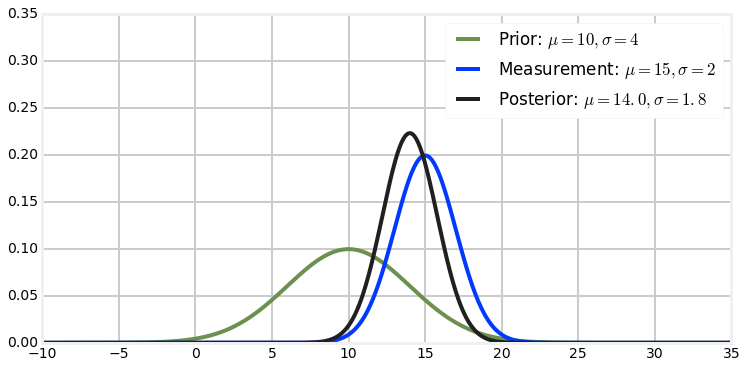

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mean1, sigma1 = (10., 4.)
mean2, sigma2 = (15., 2.)
var1 = sigma1*sigma1
var2 = sigma2*sigma2

L, H, n = -10.0, 35.0, 1000
delta = (H-L)/n

x = np.linspace(L, H, n)

y1 = mlab.normpdf(x,mean1,sigma1)
y2 = mlab.normpdf(x,mean2,sigma2)

y3 = y1 * y2
y3 = y3/(sum(y3)*delta)

# Calculate mean and variance from the production result
mean3 = sum(x*y3)*delta
var3 = sum(x*x*y3)*delta - mean3*mean3
sigma3 = math.sqrt(var3)
print (mean3, var3)

# Calculate mean and variance from the equations above
print ((mean1*var2 + mean2*var1)/(var1+var2), 1/(1/var1+1/var2))

plt.plot(x,y1, label=r'Prior: $\mu=%d, \sigma=%d$' % (mean1, sigma1))
plt.plot(x,y2, label=r'Measurement: $\mu=%d, \sigma=%d$' % (mean2, sigma2))
plt.plot(x,y3, label=r'Posterior: $\mu=%.1f, \sigma=%.1f$' % (mean3, sigma3))

plt.legend()
plt.setp(plt.gca(),'ylim',[0,.35])
plt.show()

* Function of Measurement update can be:

In [5]:
def update(mean1, var1, mean2, var2):
    new_mean = (var2 * mean1 + var1 * mean2) / (var1 + var2)
    new_var = 1/ (1/ var1 + 1/ var2)
    return [new_mean, new_var]

### Prediction

* Prior distribution

$P(x):  \mathcal{N}(\mu_1,\,\sigma_1^2)$

* Probability of motion from x to x+m

$P(x|x-\tau)  :  \mathcal{N}(\mu_2,\,\sigma_2^2)$

* Posterior distritution

$P(x^t) = \int_{-\infty}^\infty P((x-\tau)^{t-1})\, f(x|x-\tau)\, d\tau:  \mathcal{N}(\mu_3,\,\sigma_3^2)$
$$\mu_3 = \mu_1 + \mu_2$$
$$\sigma_3^2 = \sigma_1^2 + \sigma_2^2$$


24.9724892442 21.2092313842
25.0 20.0


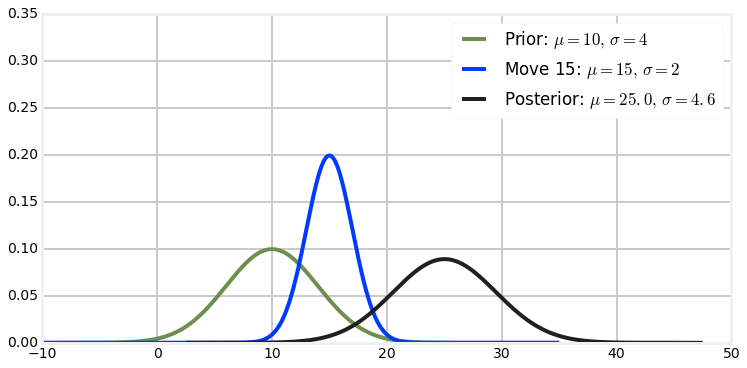

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mean1, sigma1 = (10., 4.)
mean2, sigma2 = (15., 2.)
var1 = sigma1*sigma1
var2 = sigma2*sigma2

L, H, n = -10.0, 35.0, 1000
delta = (H-L)/n

x = np.linspace(L, H, n)

y1 = mlab.normpdf(x,mean1,sigma1)
y2 = mlab.normpdf(x,mean2,sigma2)

y3 = np.convolve(y2, y1, 'same') * delta
x3 = x + (mean1 +mean2)/2

# Calculate mean and variance from the convolution result
mean3 = sum(x3*y3)*delta
var3 = sum(x3*x3*y3)*delta - mean3*mean3
sigma3 = math.sqrt(var3)
print (mean3, var3)

# Calculate mean and variance from the equations above
print (mean1 + mean2, var1+var2)

plt.plot(x,y1, label=r'Prior: $\mu=%d,\, \sigma=%d$' % (mean1, sigma1))
plt.plot(x,y2, label=r'Move %d: $\mu=%d,\, \sigma=%d$' % (mean2, mean2, sigma2))
plt.plot(x3,y3, label=r'Posterior: $\mu=%.1f,\, \sigma=%.1f$' % (mean3, sigma3))

plt.legend()
plt.setp(plt.gca(),'ylim',[0,.35])
plt.show()

* Function of prediction can be:

In [7]:
def predict (mean1, var1, mean2, var2):
    new_mean = mean1 + mean2
    new_var = var1 + var2
    return [new_mean, new_var]

### Kalman filter localization code

* Take the two functions, update and predict, and feeds them into a sequence of measurements and motions.

Set the initial measurement, $\mu = 0$, with a very large uncertainty $\sigma^2 = 10,000$.

Assume the measurement uncertainty, measurement_var, is constant, 4, and the motion uncertainty, motion_var is 2.

In [8]:
measurements = [5., 6., 7., 9., 10.]
motion = [1., 1., 2., 1., 1.]
measurement_var = 4.
motion_var = 2.
mu = 0.
var = 10000.
for n in range(len(measurements)):
    [mu, var] = update(mu, var, measurements[n], measurement_var)
    print('update: %.3f, %.3f' % (mu, var))

    [mu, var] = predict(mu, var, motion[n], motion_var)
    print('predict: %.3f, %.3f' % (mu, var))

update: 4.998, 3.998
predict: 5.998, 5.998
update: 5.999, 2.400
predict: 6.999, 4.400
update: 7.000, 2.095
predict: 9.000, 4.095
update: 9.000, 2.024
predict: 10.000, 4.024
update: 10.000, 2.006
predict: 11.000, 4.006


* In each step, Kalman filter consider only two things which keeps the computational power required of a Kalman filter relatively low and allows it to run in real time

        Update step: the previous belief & the measurement
        Prediction step: the previous belief & the mostion

* OO code of Kalman filter that works for 1 dimension

In [9]:
class KalmanFilter1D:
    def __init__(self, x0, P, R, Q):
        self.x = x0
        self.P = P
        self.R = R
        self.Q = Q


    def update(self, z):
        self.x = (self.P * z + self.x * self.R) / (self.P + self.R)
        self.P = 1. / (1./self.P + 1./self.R)


    def predict(self, u=0.0):
        self.x += u
        self.P += self.Q

measurements = [5., 6., 7., 9., 10.]
motion = [1., 1., 2., 1., 1.]
measurement_var = 4.
motion_var = 2.
mu = 0.
var = 10000.

myvehicle = KalmanFilter1D(mu, var, measurement_var, motion_var)

for n in range(len(measurements)):
    myvehicle.update(measurements[n])
    print('update: %.3f, %.3f' % (myvehicle.x, myvehicle.P))
    
    myvehicle.predict(motion[n])
    print('predict: %.3f, %.3f' % (myvehicle.x, myvehicle.P))

update: 4.998, 3.998
predict: 5.998, 5.998
update: 5.999, 2.400
predict: 6.999, 4.400
update: 7.000, 2.095
predict: 9.000, 4.095
update: 9.000, 2.024
predict: 10.000, 4.024
update: 10.000, 2.006
predict: 11.000, 4.006


## Kalman Filter with Multiple Dimensions

* Instead of being a number, the mean becomes a vector with one element for each of the dimensions.
* The variance is replaced by the covariance, which is a matrix with d rows and d columns when the space has d dimensions.

### Multivariate Gassian

* Generalization of the one-dimensional (univariate) Gassian distribution to higher dimensions
* A random vector ${\mathbf x}=[X_1, \dots, X_k]$ is said to be k-variate normally distributed if every linear combination of its $k$ components has a univariate normal distribution
$$\mathbf{x}\ \sim\ \mathcal{N}(\boldsymbol\mu,\, \boldsymbol\Sigma)$$
with $k$-dimensional mean vector
$$\boldsymbol\mu = [ \operatorname{E}[X_1], \operatorname{E}[X_2], \ldots, \operatorname{E}[X_k]]$$
and $k \times k$ covariance matrix
$$\boldsymbol\Sigma = [\operatorname{Cov}[X_i, X_j]], i=1,2,\ldots,k; j=1,2,\ldots,k$$

* Probability density function
$$f_{\mathbf x}(x_1,\ldots,x_k) =
\frac{1}{\sqrt{(2\pi)^k|\boldsymbol\Sigma|}}
\exp\left(-\frac{1}{2}({\mathbf x}-{\boldsymbol\mu})^\mathrm{T}{\boldsymbol\Sigma}^{-1}({\mathbf x}-{\boldsymbol\mu})
\right)$$
exists only when $\Sigma$ is positive-definite matrix

* Exammple: a bivariate Gaussian probability density function centered at (0, 0), with covariance matrix [ 1.00, 0.50 ; 0.50, 1.00 ].

See [bivariate normal at mathworld](http://mathworld.wolfram.com/BivariateNormalDistribution.html)

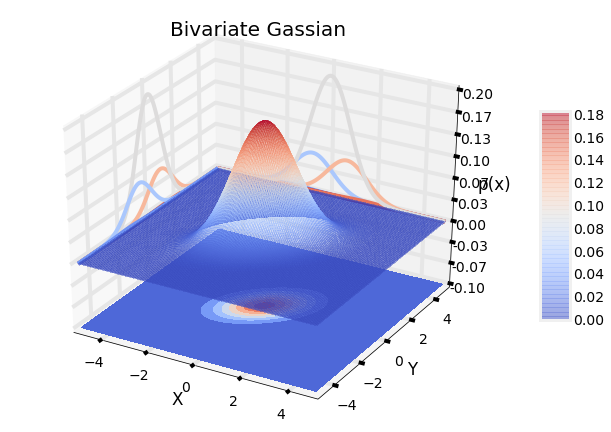

In [10]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.mlab import bivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
x = np.linspace(-5, 5, 200)
y = x
X,Y = np.meshgrid(x, y)
Z = bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0, mux=0.0, muy=0.0, sigmaxy=0.5)

#surf = ax.plot_surface(X, Y, Z, rstride=8, cstride=8, color='g', alpha=0.3)
#surf = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4, color='g', alpha=0.3)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, alpha=0.3, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.1, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-5, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=5, cmap=cm.coolwarm)


ax.set_zlim(-0.1, 0.2)

ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('p(x)')

plt.title('Bivariate Gassian')

plt.show()

Here is an animation of one standard deviation of a bivariate Gaussian probability density function centered at (2, 7), with covariance matrix [ 2.00, x; x, 2.00 ], x = 0, 0.1, ..., 1.9. The ellipse shows the boundary for the $1\sigma$ probability (This is like taking a horizontal slice out of the 3D plot).
<img src='multivariate_ellipse.gif'>

Here is a contour plot which takes 3 different horizontal slices ($1\sigma, \, 2\sigma, \, 3\sigma$) of the multivariate Gaussian chart and displays them in 2D.


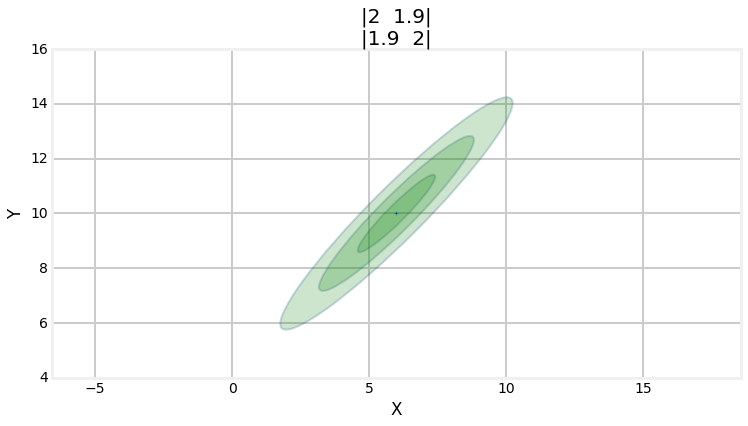

In [11]:
import stats
import matplotlib.pylab as pylab


P = np.array([[2, 1.9], [1.9, 2]])
stats.plot_covariance_ellipse((6, 10), P,  facecolor='g', alpha=0.2, #edgecolor='k', 
                              variance=[1, 2**2, 3**2],
                              axis_equal=True, title='|2  1.9|\n|1.9  2|')
plt.xlabel('X')
plt.ylabel('Y')
pylab.rcParams['figure.figsize'] = 8,8
plt.grid()
plt.show()

### Multiplying Multivariate Gaussians

$$\begin{aligned}
\mu &= \Sigma_2(\Sigma_1 + \Sigma_2)^{-1}\mu_1 + \Sigma_1(\Sigma_1 + \Sigma_2)^{-1}\mu_2 \\
\Sigma &= \Sigma_1(\Sigma_1+\Sigma_2)^{-1}\Sigma_2
\end{aligned}$$

For some intuition about this, recall the equations for multiplying univariate Gaussians:

$$\begin{aligned}
\mu &=\frac{\sigma_1^2 \mu_2 + \sigma_2^2 \mu_1} {\sigma_1^2 + \sigma_2^2}, \\
\sigma^2 &= \frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2}
\end{aligned}$$

In [12]:
from numpy.linalg import inv
from numpy import asarray, dot

def multivariate_multiply(m1, c1, m2, c2):

    C1 = asarray(c1)
    C2 = asarray(c2)
    M1 = asarray(m1)
    M2 = asarray(m2)

    sum_inv = inv(C1+C2)
    C3 = dot(C1, sum_inv).dot(C2)

    M3 = (dot(C2, sum_inv).dot(M1) +
          dot(C1, sum_inv).dot(M2))
    return M3, C3

> * Numpy provides two types to implement matrices: numpy.array and numpy.matrix.
> * numpy.matrix is deprecated, and you should always use numpy.array even when numpy.matrix is more convenient.
> * Perform matrix addition with the + operator, but matrix multiplication requires the dot method or function. The * operator performs element-wise multiplication

Suppose that we are tracking an aircraft with radar systems.
        Radars give the range and bearing to a target. 
* Uncertain about the initial position of the aircraft with the covariance 

$$P_0 = \begin{bmatrix}6 & 0\\ 0 & 6\end{bmatrix}$$

* A radar is very accurate in the bearing measurement, but not very accurate at the range

$$P_1 = \begin{bmatrix}2 & 1.9\\ 1.9 & 2\end{bmatrix}$$

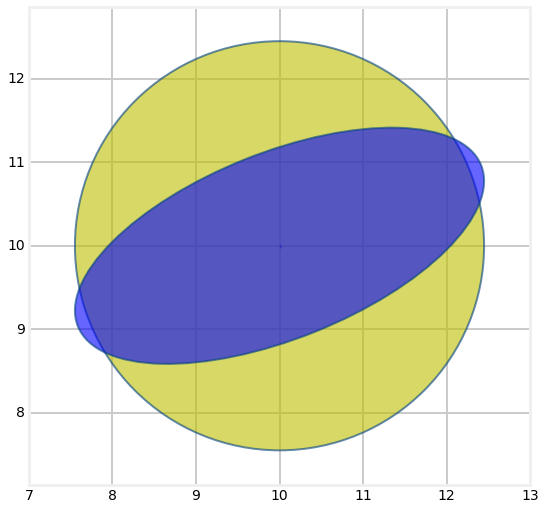

In [13]:
P0 = np.array([[6, 0], [0, 6]])
P1 = np.array([[6, 1.9], [1.9, 2]])
stats.plot_covariance_ellipse((10, 10), P0, facecolor='y', alpha=0.6)
stats.plot_covariance_ellipse((10, 10), P1, facecolor='b', alpha=0.6)
#plt.grid()

* Multiply the two Gaussians together to combine the information.

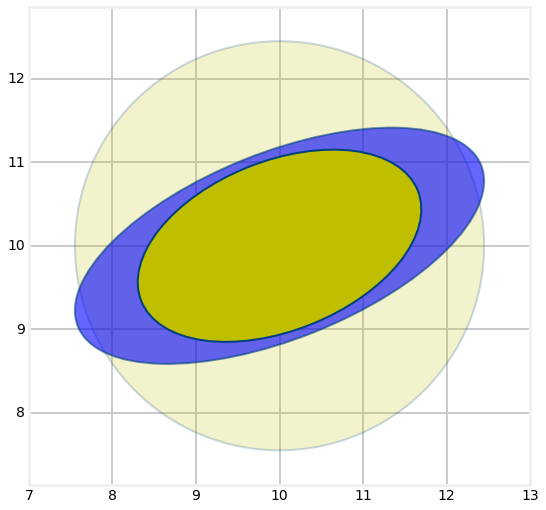

In [14]:
P2 = multivariate_multiply((10,10), P0, (10,10), P1)[1]

stats.plot_covariance_ellipse((10, 10), P0, facecolor='y', alpha=0.2)
stats.plot_covariance_ellipse((10, 10), P1, facecolor='b', alpha=0.6)
stats.plot_covariance_ellipse((10, 10), P2, facecolor='y')
plt.grid()

### Two-dimensional estimate

Given the 2D tracking data at time t=1,2, and 3 seconds. What does your intuition tell you the value of x will be at time t=4 seconds?

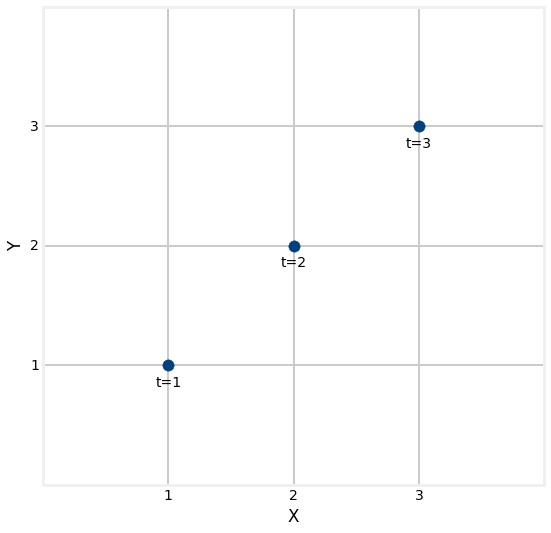

In [15]:
import matplotlib.pyplot as plt

plt.scatter ([1,2,3], [1,2,3], s=128, color='#004080')
plt.xlim([0,4]);
plt.ylim([0,4])

plt.annotate('t=1', xy=(1,1), xytext=(0,-10),
              textcoords='offset points', ha='center', va='top')

plt.annotate('t=2', xy=(2,2), xytext=(0,-10),
              textcoords='offset points', ha='center', va='top')

plt.annotate('t=3', xy=(3,3), xytext=(0,-10),
              textcoords='offset points', ha='center', va='top')

plt.xlabel("X")
plt.ylabel("Y")

plt.xticks(np.arange(1,4,1))
plt.yticks(np.arange(1,4,1))
#plt.grid()
plt.show()

It appears that the object is moving in a straight line. The most reasonable guess is that at t=4 second the object is at (4,4).

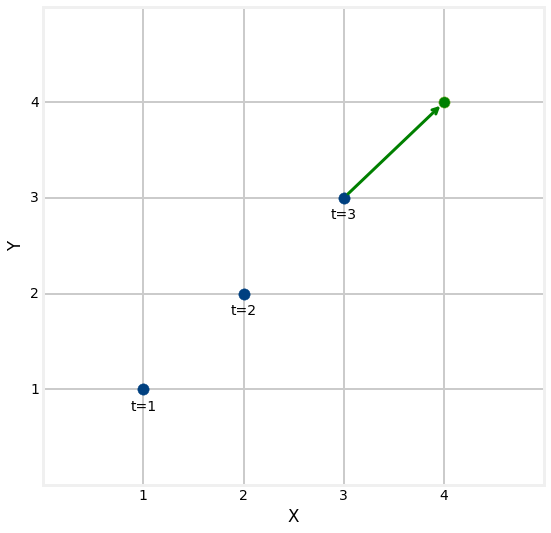

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter ([1,2,3], [1,2,3], s=128, color='#004080')
plt.xlim([0,4]);
plt.ylim([0,4])

plt.annotate('t=1', xy=(1,1), xytext=(0,-10),
              textcoords='offset points', ha='center', va='top')

plt.annotate('t=2', xy=(2,2), xytext=(0,-10),
              textcoords='offset points', ha='center', va='top')

plt.annotate('t=3', xy=(3,3), xytext=(0,-10),
              textcoords='offset points', ha='center', va='top')

plt.xlabel("X")
plt.ylabel("Y")

plt.xticks(np.arange(1,5,1))
plt.yticks(np.arange(1,5,1))

plt.scatter ([4], [4], c='g',s=128, color='#8EBA42')
ax = plt.axes()
ax.annotate('', xy=(4,4), xytext=(3,3),
            arrowprops=dict(arrowstyle='->',
                            ec='g',
                            shrinkA=6, shrinkB=5,
                            lw=3))
plt.xlim([0,5])
plt.ylim([0,5])

#plt.grid()
plt.show()

Build a two-dimensional estimate, where 
* X-axis: the location
* Y-axis: the velocity

If initially, we know location but not velocity, it can be represented with an elongated Gaussian around the correct location, but really broad in the space of velocities.

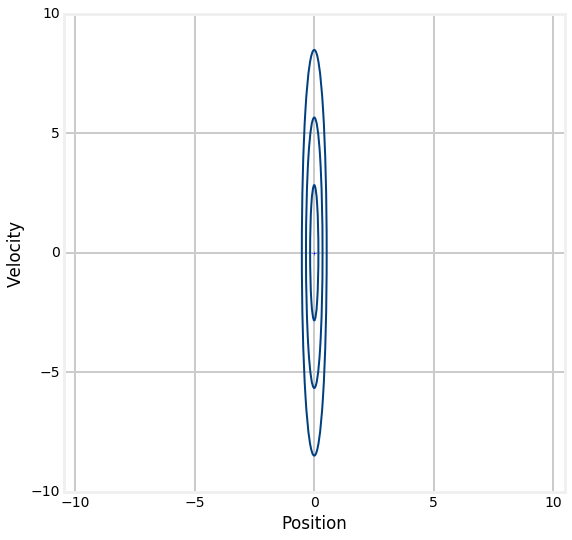

In [17]:
import stats
cov = np.array([[0.03,0], [0,8]])
e = stats.covariance_ellipse (cov)
sigma=[1, 4, 9]
stats.plot_covariance_ellipse ((0,0), ellipse=e, variance=sigma)
plt.xlabel("Position")
plt.ylabel("Velocity")
plt.grid()
plt.show()

* Assume the velocity is 0, where would the posterior be after the prediction?
        If you start at location 0, then a velocity of zero would leave you in the exact same place, (0, 0).

* Where would the prediction be one time stamp later, starting at location 0, and velocity three? 

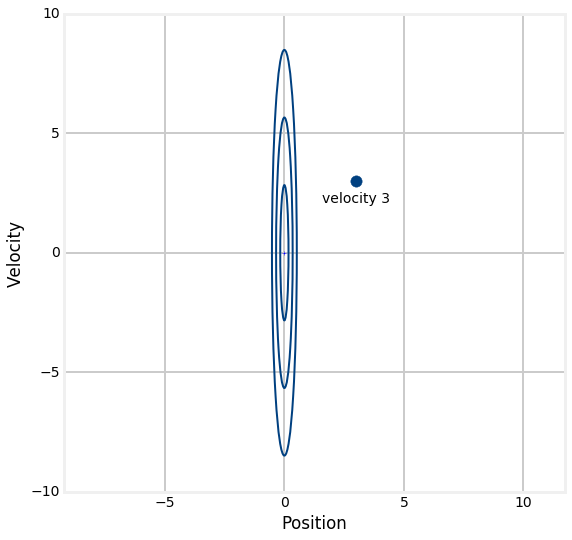

In [18]:
import stats
cov = np.array([[0.03,0], [0,8]])
e = stats.covariance_ellipse (cov)
sigma=[1, 4, 9]
stats.plot_covariance_ellipse ((0,0), ellipse=e, variance=sigma)

plt.scatter ([3], [3], s=128, color='#004080')
plt.annotate('velocity 3', xy=(3,3), xytext=(0,-10),
              textcoords='offset points', ha='center', va='top')


plt.xlabel("Position")
plt.ylabel("Velocity")
plt.grid()
plt.show()

* Where would the prediction be one time stamp later, starting at location 0, and velocity three? 
        If you start at location 0, then a velocity of three would move you (3, 3).
* Where would the prediction be one time stamp later, starting at location 0, and velocity five? 

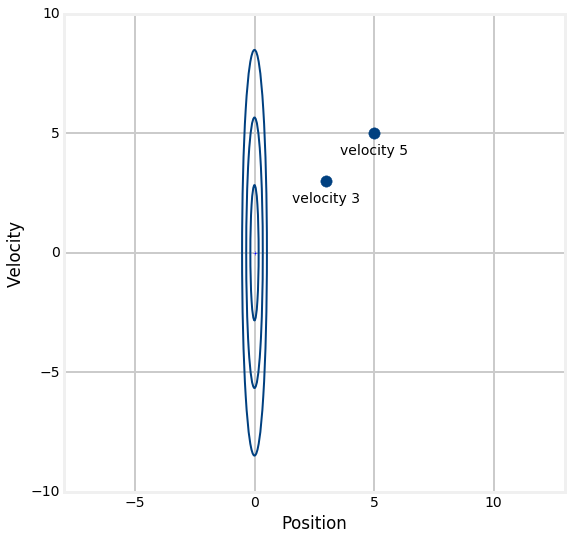

In [19]:
import stats
cov = np.array([[0.03,0], [0,8]])
e = stats.covariance_ellipse (cov)
sigma=[1, 4, 9]
stats.plot_covariance_ellipse ((0,0), ellipse=e, variance=sigma)

plt.scatter ([3, 5], [3, 5], s=128, color='#004080')
plt.annotate('velocity 3', xy=(3,3), xytext=(0,-10),
              textcoords='offset points', ha='center', va='top')
plt.annotate('velocity 5', xy=(5,5), xytext=(0,-10),
              textcoords='offset points', ha='center', va='top')


plt.xlabel("Position")
plt.ylabel("Velocity")
plt.grid()
plt.show()

* Where would the prediction be one time stamp later, starting at location 0, and velocity five? 
        If you start at location 0, then a velocity of five would move you (5, 5).

* Where would the prediction be one time stamp later, starting at location 0, and velocity seven?

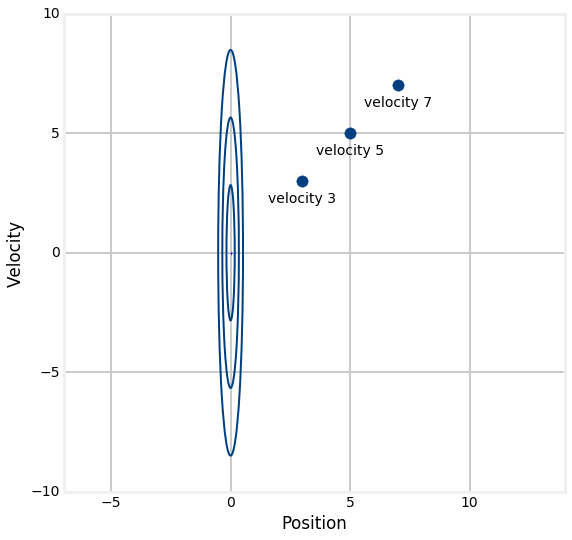

In [20]:
import stats
cov = np.array([[0.03,0], [0,8]])
e = stats.covariance_ellipse (cov)
sigma=[1, 4, 9]
stats.plot_covariance_ellipse ((0,0), ellipse=e, variance=sigma)

plt.scatter ([3, 5, 7], [3, 5, 7], s=128, color='#004080')
plt.annotate('velocity 3', xy=(3,3), xytext=(0,-10),
              textcoords='offset points', ha='center', va='top')
plt.annotate('velocity 5', xy=(5,5), xytext=(0,-10),
              textcoords='offset points', ha='center', va='top')
plt.annotate('velocity 7', xy=(7,7), xytext=(0,-10),
              textcoords='offset points', ha='center', va='top')


plt.xlabel("Position")
plt.ylabel("Velocity")
plt.grid()
plt.show()

* Where would the prediction be one time stamp later, starting at location 0, and velocity seven? 
        If you start at location 0, then a velocity of seven would move you (7, 7).

When you find multiple data points, you find that all of the possibilities link to a two-dimensional Gaussian (the red one).

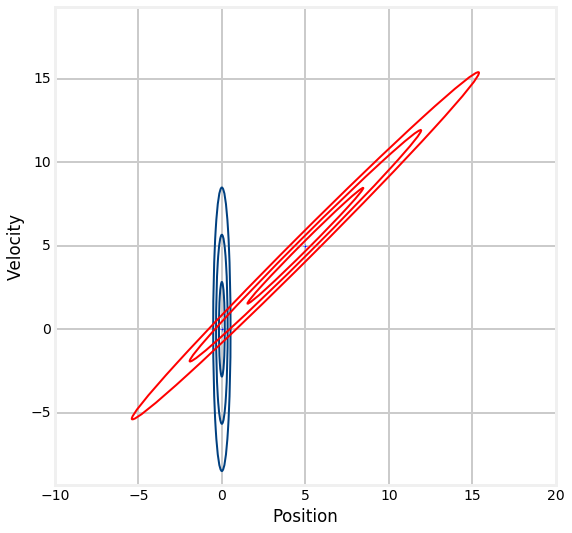

In [21]:
import stats
cov = np.array([[0.03,0], [0,8]])
e = stats.covariance_ellipse (cov)
cov3 = np.array([[12,11.95], [11.95,12]])
e3 = stats.covariance_ellipse (cov3)

sigma=[1, 4, 9]

stats.plot_covariance_ellipse ((0,0), ellipse=e, variance=sigma)
stats.plot_covariance_ellipse ((5,5), ellipse=e3, variance=sigma,
                                   edgecolor='r')

plt.xlabel("Position")
plt.ylabel("Velocity")
#plt.grid()
plt.show()

Now after one second we get a position update of x=5. This implies that our velocity is roughly 5 m/s.

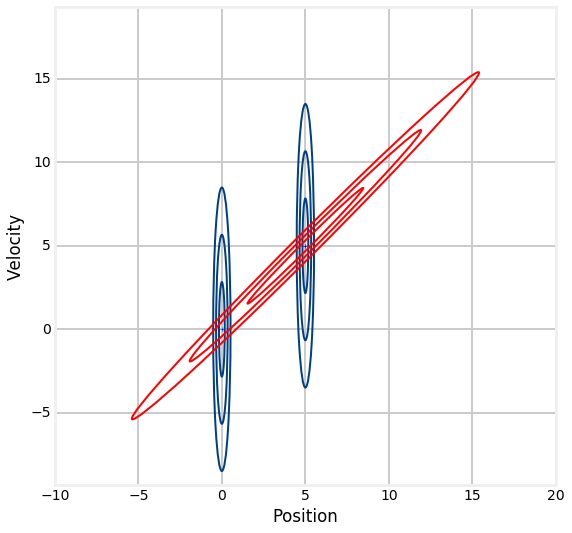

In [22]:
import stats
cov = np.array([[0.03,0], [0,8]])
e = stats.covariance_ellipse (cov)
cov2 = np.array([[0.03,0], [0,4]])
e2 = stats.covariance_ellipse (cov2)
cov3 = np.array([[12,11.95], [11.95,12]])
e3 = stats.covariance_ellipse (cov3)

sigma=[1, 4, 9]

stats.plot_covariance_ellipse ((0,0), ellipse=e, variance=sigma)
stats.plot_covariance_ellipse ((5,5), ellipse=e, variance=sigma)
stats.plot_covariance_ellipse ((5,5), ellipse=e3, variance=sigma,
                                   edgecolor='r')

plt.xlabel("Position")
plt.ylabel("Velocity")
plt.grid()
plt.show()

* Use the math from the last section and multiply the two covariances together.

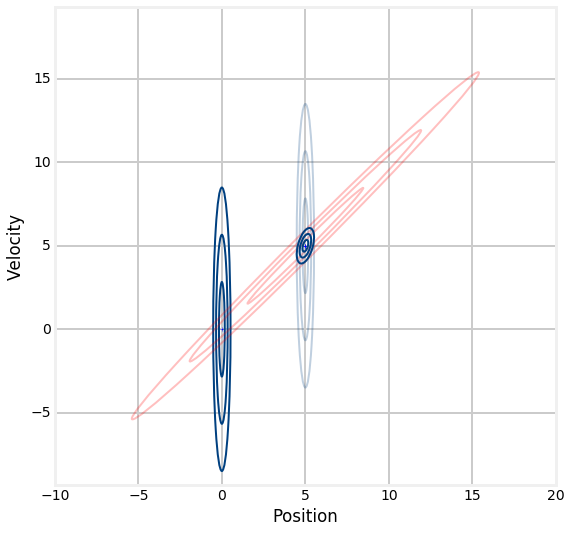

In [23]:
import stats
cov = np.array([[0.03,0], [0,8]])
e = stats.covariance_ellipse (cov)
cov2 = np.array([[0.03,0], [0,4]])
e2 = stats.covariance_ellipse (cov2)
cov3 = np.array([[12,11.95], [11.95,12]])
e3 = stats.covariance_ellipse (cov3)

M1 = np.array([[5, 5]]).T
m4, cov4 = stats.multivariate_multiply(M1, cov2, M1, cov3)
e4 = stats.covariance_ellipse (cov4)

sigma=[1, 4, 9]

stats.plot_covariance_ellipse ((0,0), ellipse=e, variance=sigma)
stats.plot_covariance_ellipse ((5,5), ellipse=e, variance=sigma,
                               alpha=0.25)
stats.plot_covariance_ellipse ((5,5), ellipse=e3, variance=sigma,
                               edgecolor='r', alpha=0.25)
stats.plot_covariance_ellipse (m4[:,0], ellipse=e4, variance=sigma)


plt.xlabel("Position")
plt.ylabel("Velocity")
#plt.grid()
plt.show()

* The new covariance lies at the intersection of the two covariances.
* Slightly tilted, showing that there is some correlation between the position and velocity.
* Far smaller because the previous estimate's Gaussian was multiplied by the new measurement's Gaussian.
* Only sensor detecting the position. No sensor providing velocity. 
* In Kalman filters the velocity is called an unobserved variable. 

### Kalman Filter Algorithm

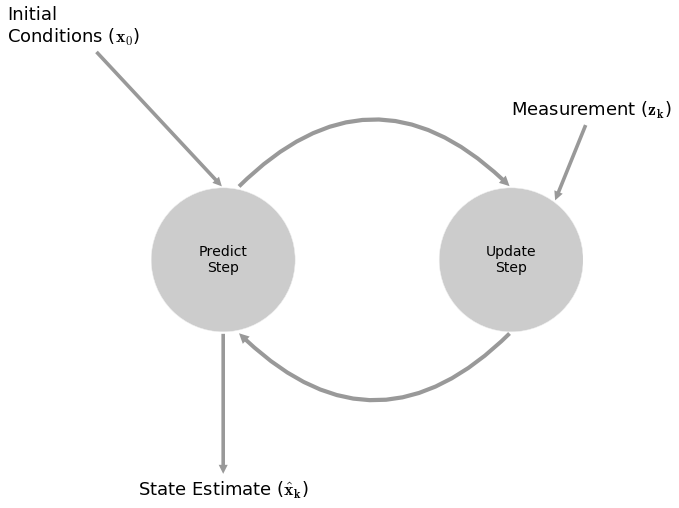

In [24]:
# http://nbviewer.ipython.org/github/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/01_g-h_filter.ipynb
import numpy as np
import pylab as plt
from matplotlib.patches import Circle, Rectangle, Polygon, Arrow, FancyArrow

box_bg = '#CCCCCC'
arrow1 = '#88CCFF'
arrow2 = '#88FF88'

plt.figure(figsize=(6,6), facecolor='w')
ax = plt.axes((0, 0, 1, 1),
              xticks=[], yticks=[], frameon=False)
#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)


pc = Circle((4,5), 0.5, fc=box_bg)
uc = Circle((6,5), 0.5, fc=box_bg)
ax.add_patch (pc)
ax.add_patch (uc)


plt.text(4,5, "Predict\nStep",ha='center', va='center', fontsize=14)
plt.text(6,5, "Update\nStep",ha='center', va='center', fontsize=14)

#btm
ax.annotate('',
            xy=(4.1, 4.5),  xycoords='data',
            xytext=(6, 4.5), textcoords='data',
            size=20,
            arrowprops=dict(arrowstyle="simple",
                            fc="0.6", ec="none",
                            patchB=pc,
                            patchA=uc,
                            connectionstyle="arc3,rad=-0.5"))
#top
ax.annotate('',
            xy=(6, 5.5),  xycoords='data',
            xytext=(4.1, 5.5), textcoords='data',
            size=20,
            arrowprops=dict(arrowstyle="simple",
                            fc="0.6", ec="none",
                            patchB=uc,
                            patchA=pc,
                            connectionstyle="arc3,rad=-0.5"))


ax.annotate('Measurement ($\mathbf{z_k}$)',
            xy=(6.3, 5.4),  xycoords='data',
            xytext=(6,6), textcoords='data',
            size=18,
            arrowprops=dict(arrowstyle="simple",
                            fc="0.6", ec="none"))

ax.annotate('',
            xy=(4.0, 3.5),  xycoords='data',
            xytext=(4.0,4.5), textcoords='data',
            size=18,
            arrowprops=dict(arrowstyle="simple",
                            fc="0.6", ec="none"))

ax.annotate('Initial\nConditions ($\mathbf{x_0}$)',
            xy=(4.0, 5.5),  xycoords='data',
            xytext=(2.5,6.5), textcoords='data',
            size=18,
            arrowprops=dict(arrowstyle="simple",
                            fc="0.6", ec="none"))

plt.text (4,3.4,'State Estimate ($\mathbf{\hat{x}_k}$)',
          ha='center', va='center', fontsize=18)
plt.axis('equal')
#plt.axis([0,8,0,8])
plt.show()

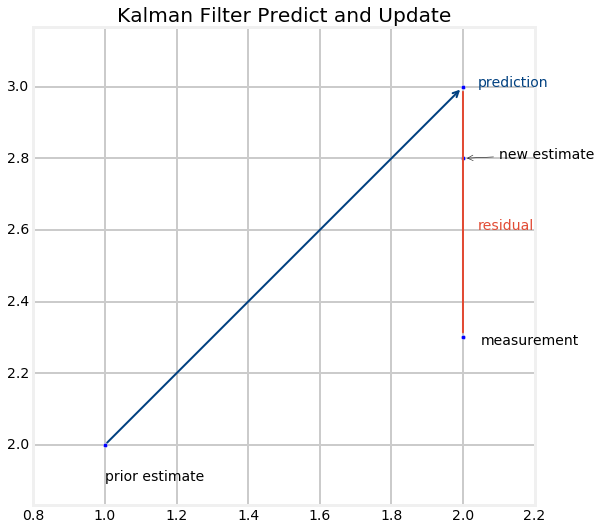

In [25]:
plt.xlim([0.9,2.5])
plt.ylim([1.5,3.5])

plt.scatter ([1,2,2],[2,3,2.3])
plt.scatter ([2],[2.8],marker='o')
ax = plt.axes()
ax.annotate('', xy=(2,3), xytext=(1,2),
            arrowprops=dict(arrowstyle='->', ec='#004080',
                            lw=2,
                            shrinkA=3, shrinkB=4))
ax.annotate('prediction', xy=(2.04,3.), color='#004080')
ax.annotate('measurement', xy=(2.05, 2.28))
ax.annotate('prior estimate', xy=(1, 1.9))
ax.annotate('residual', xy=(2.04,2.6), color='#e24a33')
ax.annotate('new estimate', xy=(2,2.8),xytext=(2.1,2.8),
            arrowprops=dict(arrowstyle='->', ec="k", shrinkA=3, shrinkB=4))
ax.annotate('', xy=(2,3), xytext=(2,2.3),
            arrowprops=dict(arrowstyle="-",
                            ec="#e24a33",
                            lw=2,
                            shrinkA=5, shrinkB=5))
plt.title("Kalman Filter Predict and Update")
plt.axis('equal')
#plt.grid()
plt.show()


### The Equations

* Optimal mathematical solution
       The Kalman filter finds what is called a least squared fit to the set of measurements to produce an optimal output. 
* To create a Kalman filter for an application, you will be only specifying a number of parameters that are used by it

> Kalman Filter Predict Step:

> $$
\begin{aligned}
\hat{\textbf{x}}^-_{k} &= \mathbf{F}_{k-1}\hat{\textbf{x}}_{k-1} + \mathbf{B}_{k-1}\mathbf{u}_{k-1}\;\;\;&(1) \\
\textbf{P}^-_{k} &=  \mathbf{F}_{k-1}\textbf{P}_{k-1}\mathbf{F}_{k-1}^\mathsf{T} + \textbf{Q}_{k-1}\;\;\;&(2)
\end{aligned}
$$

> Kalman Filter Update Step:

>$$
\begin{aligned}
\textbf{y}_k &= \textbf{z}_k - \textbf{H}_k\hat{\textbf{}x}^-_k\;\;\;&(3) \\
\mathbf{S}_k &= \textbf{H}_k\textbf{P}^-_k\textbf{H}_k^\mathsf{T} + \textbf{R}_k \;\;\;&(4) \\
\textbf{K}_k &= \textbf{P}^-_k\textbf{H}_k^\mathsf{T}\mathbf{S}_k^{-1}\;\;\;&(5) \\
\hat{\textbf{x}}_k  &= \hat{\textbf{x}}^-_k +\textbf{K}_k\textbf{y} \;\;\;&(6)\\
\mathbf{P}_k &= (\mathbf{I}-\mathbf{K}_k\mathbf{H}_k)\mathbf{P}^-_k\;\;\;&(7)
\end{aligned}
$$

* Each bold letter denotes a matrix or vector
* The subscripts indicate which time step the data comes from; $k$ is now, $k+1$ is the next step. 
* The caret (^) indicates that the value is an estimate. 
* The raised $^-$ denotes a prediction.
* For a matrix $\mathbf{A}$, $\mathbf{A}^\mathsf{T}$ signifies its transpose, and $\mathbf{A}^{-1}$ its inverse. 
* $\hat{\mathbf{x}}^-_{k+1}$ represents the prediction for the estimate of $\mathbf{x}$ at time step $k+1$
* $\mathbf{x}$ is some vector in the form $\mathbf{x} = \begin{bmatrix}x_1&x_2&..&x_n\end{bmatrix}^\mathsf{T}.$ 

### Kalman Equations Expressed as an Algorithm

* The above notation is unnecessarily complicated for writing code
* The subscripts indicate the time step, but when writing code it is very clear what is being calculated at each time step.
* The following simplified equations express an algorithm.

$$
\begin{aligned}
\text{Predict Step}\\
\mathbf{x^-} &= \mathbf{F x} + \mathbf{B u}\;\;\;&(1) \\
\mathbf{P^-} &= \mathbf{FP{F}}^\mathsf{T} + \mathbf{Q}\;\;\;&(2) \\
\\
\text{Update Step}\\
\textbf{y} &= \mathbf{z} - \mathbf{H x^-} \;\;\;&(3)\\
\textbf{S} &= \mathbf{HP^-H}^\mathsf{T} + \mathbf{R} \;\;\;&(4)\\
\mathbf{K} &= \mathbf{P^-H}^\mathsf{T} \mathbf{S}^{-1}\;\;\;&(5) \\
\mathbf{x} &=\mathbf{x^-} +\mathbf{K\textbf{y}} \;\;\;&(6)\\
\mathbf{P} &= (\mathbf{I}-\mathbf{KH})\mathbf{P^-}\;\;\;&(7)
\end{aligned}
$$

### Implementation in Python

* The prediction equations

$$
\begin{aligned}
\mathbf{x^-} &= \mathbf{F x} + \mathbf{B u}\;\;\;&(1) \\
\mathbf{P^-} &= \mathbf{FPF}^\mathsf{T} + \mathbf{Q}\;\;\;&(2) \\
\end{aligned}
$$

Implementation in Python and NumPy

    x = dot(F, x) + dot(B, u)
    P = dot(F, P).dot(F.T) + Q

* The update step

$$
\begin{aligned}
\textbf{y} &= \mathbf{z} - \mathbf{H x^-} \;\;\;&(3)\\
\textbf{S} &= \mathbf{HP^-H}^\mathsf{T} + \mathbf{R} \;\;\;&(4)\\
\mathbf{K} &= \mathbf{P^-H}^\mathsf{T} \mathbf{S}^{-1}\;\;\;&(5) \\
\mathbf{x}&=\mathbf{x^-} +\mathbf{K\textbf{y}} \;\;\;&(6)\\
\mathbf{P}&= (\mathbf{I}-\mathbf{KH})\mathbf{P^-}\;\;\;&(7)
\end{aligned}
$$


Implementation in Python and NumPy

    y = z - dot(H, x)
    S = dot(H, P).dot(H.T) + R
    K = dot(P, H.T).dot(np.linalg.inv(S))
    x = x + dot(K,y)
    P = (I - dot(K, H)).dot(P)

In [26]:
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt
import numpy.random as random
from numpy import dot

class KalmanFilter:

    def __init__(self, dim_x, dim_z, dim_u=0):
        """ Create a Kalman filter. You are responsible for setting 
        the various state variables to reasonable values; the defaults 
        below will not give you a functional filter.

        **Parameters**

        dim_x : int
            Number of state variables for the Kalman filter. For 
            example, if you are tracking the position and velocity 
            of an object in two dimensions, dim_x would be 4.

            This is used to set the default size of P, Q, and u

        dim_z : int
            Number of of measurement inputs. For example, if the sensor
            provides you with position in (x,y), dim_z would be 2.

        dim_u : int (optional)
            size of the control input, if it is being used.
            Default value of 0 indicates it is not used.
        """

        self.x = np.zeros((dim_x,1)) # state
        self.P = np.eye(dim_x)       # uncertainty covariance
        self.Q = np.eye(dim_x)       # process uncertainty
        self.u = np.zeros((dim_x,1)) # motion vector
        self.B = 0                   # control transition matrix
        self.F = 0                   # state transition matrix
        self.H = 0                   # Measurement function
        self.R = np.eye(dim_z)       # state uncertainty

        # identity matrix. Do not alter this. 
        self._I = np.eye(dim_x)


    def update(self, Z, R=None):
        """
        Add a new measurement (Z) to the kalman filter. If Z is
        None, nothing is changed.

        **Parameters**

        Z : np.array
            measurement for this update.

        R : np.array, scalar, or None
            Optionally provide R to override the measurement noise 
            for this one call, otherwise  self.R will be used.
        """

        if Z is None:
            return

        if R is None:
            R = self.R
        elif np.isscalar(R):
            R = np.eye(self.dim_z) * R

        # error (residual) between measurement and prediction
        y = Z - dot(self.H, self.x)

        # project system uncertainty into measurement space 
        S = dot(self.H, self.P).dot(self.H.T) + R

        # map system uncertainty into kalman gain
        K = dot(self.P, self.H.T).dot(linalg.inv(S))

        # predict new x with residual scaled by the kalman gain
        self.x += dot(K, y)

        I_KH = self._I - dot(K, self.H)
        self.P = I_KH.dot(self.P)


    def predict(self, u=0):
        """ Predict next position.

        **Parameters**

        u : np.array
            Optional control vector. If non-zero, it is multiplied
            by B to create the control input into the system.
        """

        self.x = dot(self.F, self.x) + dot(self.B, u)
        self.P = self.F.dot(self.P).dot(self.F.T) + self.Q

### Tracking a vehicle

Let's go back to our tried problem of tracking our vehicle using *unobserved variables*.

    1. predict the next value for x with "x + vel*time".
    2. adjust covariance for x for uncertainty caused by prediction
    3. get measurement for x
    4. compute residual as: "x - x_prediction"
    5. compute kalman gain based on noise levels
    6. compute new position as "residual * kalman gain"
    7. compute covariance for x to account for additional
       information the measurement provides

#### **Step 1:** Choose the State Variables and Set Initial Conditions

* Track both the position and velocity of the vehicle, two state variables.
> This is a design choice with implications and assumptions. For example, we could optionally also track acceleration. The decision to track position and velocity contains an assumption that acceleration is zero, which of course often not true. If the object being tracked *is* accelerating, then the performance of the filter will be suboptimal, or even diverge.

* Position: *observed variables* - directly measured by a sensor.
* Velocity: *unobserved variables* - inferred from the observed variables.

* Use the multivariate Gaussian to specify a position (ex. 10.0 m) and a velocity (ex. 4.5 m/s)

$$\mu = \begin{bmatrix}10.0\\4.5\end{bmatrix}$$

* Use an $n\times 1$ matrix to store  $n$ state variables. For the tracking problem, we use $x$ to denote position, and the first derivative of $x$, $\dot{x}$, for velocity. The Kalman filter equations use $\mathbf{x}$ for the state, which is just the mean of the multivariate Gaussian.

$$\mathbf{x} =\begin{bmatrix}x \\ \dot{x}\end{bmatrix}$$

* For the covariance $\Sigma$, the Kalman filter equations use the alternative symbol $\mathbf{P}$.

* Set the initial position to 1 m, the initial velocity to 2.3 m/s, the $\sigma^2$ of the position to 500, and the $\sigma^2$ of the velocity to 400.

$$
\begin{aligned}
\mathbf{x} &= \begin{bmatrix}1 \\ 2.3\end{bmatrix} \\
\mathbf{P} &= \begin{bmatrix}500 & 0 \\ 0&400\end{bmatrix} \\
\end{aligned}
$$

#### **Step 2:** Design the State Transition Function

* This step is telling a Kalman filter how to predict the next state from the current state by providing it with equations that describe the physical model of the system, *process model*, which is described with a set of equations, *State Transition Function*.
* To track a vehicle, we just need to provide it with the Newtonian equations for motion.

$$x_t = \dot{x}_{t-1}\Delta t + x_{t-1}$$

To avoid subscripts, uses $x^-$ to denote the predicted position

$$x^- = \dot{x}\Delta t + x$$

* The $\mathbf{B u}$ term is equal to zero.

$$
\begin{aligned}
\mathbf{x}^- &= \mathbf{Fx} \\
\begin{bmatrix}x \\ \dot{x}\end{bmatrix}^- &= \mathbf{F}\begin{bmatrix}x \\ \dot{x}\end{bmatrix}
\end{aligned}
$$

* The first row of the F is easy to derive:

$$
\begin{aligned}
{\begin{bmatrix}x\\\dot{x}\end{bmatrix}}^- &=\begin{bmatrix}1&\Delta t \\ ?&?\end{bmatrix} \begin{bmatrix}x \\ \dot{x}\end{bmatrix}
\end{aligned}
$$


* Assume that

$$\dot{x}^- = \dot{x}$$

which gives us the second row of $\mathbf{F}$ as follows, once we set $\Delta t = 1$:


$$
{\begin{bmatrix}x\\\dot{x}\end{bmatrix}}^- =\begin{bmatrix}1&1 \\ 0&1\end{bmatrix} \times \begin{bmatrix}x \\ \dot{x}\end{bmatrix}
$$

$$\mathbf{F}=\begin{bmatrix}1&1 \\ 0&1\end{bmatrix}$$ 

#### **Step 3:** Design the Measurement Function

* The Kalman filter equation that performs this step is:

$$\textbf{y} = \mathbf{z} - \mathbf{H x^-} \;\;\;(3)$$

where $\textbf{y}$ is the residual, $\mathbf{x^-}$ is the predicted value for $\mathbf{x}$, $\textbf{z}$ is the measurement, and $\textbf{H}$ is the measurement function. It is just a matrix that we multiply the state into to convert it into a measurement.

* For our tracking problem we have a sensor that measures position, but no sensor that measures velocity. 

$$
\begin{aligned}
 \textbf{y} = \mathbf{z} &- \begin{bmatrix}1&0\end{bmatrix} \begin{bmatrix}x \\ \dot{x}\end{bmatrix} \\
\mathbf{H} &= \begin{bmatrix}1&0\end{bmatrix}
\end{aligned}
$$

#### **Step 4:** Design the Measurement Noise Matrix

* The *measurement noise matrix* is a matrix that models the noise in our sensors as a covariance matrix, which can be a very difficult thing to do in practice. 

> * A complicated system may have many sensors, the correlation between them might not be clear, and usually their noise is not a pure Gaussian. 
> * For example, a sensor might be biased to read high if the temperature is high, and so the noise is not distributed equally on both sides of the mean. 

* The Kalman filter equations uses the symbol $R$ for this matrix. In general the matrix will have dimension $m{\times}m$, where $m$ is the number of sensors. 

* Only 1 sensor here

$$R = \begin{bmatrix}5\end{bmatrix}$$

#### **Step 5:** Design the Process Noise Matrix

* What is *process noise*?

> Consider the motion of a thrown ball. In a vacuum and with constant gravitational force it moves in a parabola. However, if you throw the ball on the surface of the earth you will also need to model factors like rotation and air drag. However, even when you have done all of that there is usually things you cannot account for, such as wind. Without wind sensors, we may have no way to model the wind. The Kalman filter models this as *process noise*, and calls it $\mathbf{Q}$.

* Think of the the underlying system as behaving as

$$f(x) = \mathbf{F}x + w$$

where $\mathbf{F}x$ is the state transition and $w$ is the process noise.

* In 1D tracking we used this code to implement the predict step:

    sigma = sigma + movement_sigma

* We can model the process noise as additional uncertainty.
    
    sigma = sigma + movement_sigma + process_noise

* Use linear algebra to perform this computation. 
      
    P = project_forward(P) + process_noise

where $P$ is the covariance matrix. The Kalman filter equation corresponding to this pseudocode is

$$\mathbf{P} = \mathbf{FP{F}}^\mathsf{T} + \mathbf{Q}$$

In this equation $\mathbf{FP{F}}^\mathsf{T}$ projects $\mathbf{P}$ forward to the next time step, and $\mathbf{Q}$ is the *process noise matrix*.

* If we assume that for each time period the acceleration due to process noise is constant and uncorrelated, we get the following.

For constant velocity the form is
 $$\begin{bmatrix}
 \frac{1}{4}{\Delta t}^4 & \frac{1}{2}{\Delta t}^3 \\
 \frac{1}{2}{\Delta t}^3 & \Delta t^2
 \end{bmatrix}\sigma^2
 $$

and for constant acceleration we have

 $$\begin{bmatrix}
 \frac{1}{4}{\Delta t}^4 & \frac{1}{2}{\Delta t}^3 & \frac{1}{2}{\Delta t}^2 \\
 \frac{1}{2}{\Delta t}^3 & {\Delta t}^2 & \Delta t \\
 \frac{1}{2}{\Delta t}^2 & \Delta t & 1
 \end{bmatrix} \sigma^2
 $$

A good choice is to set σ somewhere from 12Δa to Δa, where Δa is the maximum amount that the acceleration will change between sample periods. In practice we pick a number, run simulations on data, and choose a value that works well.

In [27]:
from numpy import array

def Q_discrete_white_noise(dim, dt=1., var=1.):
    assert dim == 2 or dim == 3
    if dim == 2:
        Q = array([[.25*dt**4, .5*dt**3],
                   [ .5*dt**3,    dt**2]], dtype=float)
    else:
        Q = array([[.25*dt**4, .5*dt**3, .5*dt**2],
                   [ .5*dt**3,    dt**2,       dt],
                   [ .5*dt**2,       dt,        1]], dtype=float)

    return Q * var

Q = Q_discrete_white_noise(dim=2, dt=0.1, var=2.35)
Q

array([[ 0.00005875,  0.001175  ],
       [ 0.001175  ,  0.0235    ]])

### Implementing the Kalman Filter

> Kalman filtering and optimal estimation library in Python https://github.com/rlabbe/filterpy

In [28]:
import numpy as np

veh_filter = KalmanFilter(dim_x=2, dim_z=1)
veh_filter.x = np.array([0., 0.])        # state (location and velocity)
veh_filter.F = np.array([[1, 1], [0, 1]])  # state transition matrix
veh_filter.H = np.array([[1, 0]])          # Measurement function
veh_filter.R *= 5                          # measurement noise
veh_filter.Q = Q_discrete_white_noise(2, dt=0.1, var=0.1) # process noise
veh_filter.P *= 500.                       # covariance matrix 

**1**: We just assign the initial value for our state. Here we just initialize both the position and velocity to zero. 

**2**: We set $\textbf{F}=\begin{bmatrix}1&1\\0&1\end{bmatrix}$, as in design step 2 above. 

**3**: We set $\textbf{H}=\begin{bmatrix}1&0\end{bmatrix}$, as in design step 3 above.

**4**: We set $\textbf{R} = \begin{bmatrix}5\end{bmatrix}$. $\textbf{R}$ is initialized to the identity matrix, so multiplying by 5 performs this assignment for us.

**5** We use the `Q_discrete_white_noise()` method to set $\mathbf{Q}$'s variance to 0.1.

**5**: $\mathbf{P}$ is initialized to the identity matrix of size $n{\times}n$, so multiplying by 500 assigns a variance of 500 to $x$ and $\dot{x}$. So $\verb,f.P,$ contains

$$\begin{bmatrix} 500&0\\0&500\end{bmatrix}$$

In [29]:
import numpy as np
import numpy.random as random
import math

class VehSensor(object):

    def __init__(self, x0=0, velocity=1, noise_var=0.0):
        """ x0 - initial position
            velocity - (+=right, -=left)
            noise_var - noise variance, 0== no noise
        """
        self.x = x0
        self.velocity = velocity
        self.noise = math.sqrt(noise_var)

    def sense(self):
        self.x = self.x + self.velocity
        return self.x + random.randn() * self.noise

    
def veh_tracking_filter(R, Q=0, cov=1.):
    veh_filter = KalmanFilter(dim_x=2, dim_z=1)
    veh_filter.x = np.array([0., 0.])    # (location and velocity)
    veh_filter.F = np.array([[1, 1],
                             [0, 1]]) # state transition matrix
    veh_filter.H = np.array([[1, 0]]) # Measurement function
    veh_filter.R *= R                 # measurement uncertainty
    veh_filter.P *= cov               # covariance matrix 
    if np.isscalar(Q):
        veh_filter.Q = Q_discrete_white_noise(dim=2, dt=0.1, var=Q)
    else:
        veh_filter.Q = Q
    return veh_filter


def filter_veh(noise_var=0, count=0, R=0, Q=0, P=500., data=None, 
               initial_x=None):
    """ Kalman filter 'count' readings from the VehSensor.
    'noise_var' is the variance of the noise from the measurements.
    'data' provides the measurements. If set, noise will
    be ignored and data will not be generated for you.
    
    returns a tuple of (positions, measurements, covariance)
    """
    if data is None:    
        veh = VehSensor(velocity=1, noise_var=noise_var)
        zs = [veh.sense() for t in range(count)]
    else:
        zs = data

    veh_filter = veh_tracking_filter(R=R, Q=Q, cov=P)
    if initial_x is not None:
        veh_filter.x = initial_x

    pos = [None] * count
    cov = [None] * count
    
    for t in range(count):
        z = zs[t]
        pos[t] = veh_filter.x[0]
        cov[t] = veh_filter.P
    
        # perform the kalman filter steps
        veh_filter.update(z)
        veh_filter.predict()
        
    return (pos, zs, cov)

* Plot the result, starting by filtering 50 measurements with a noise variance of 10 and a process variance of 0.01.

In [30]:
import book_plots as bp

def plot_track(noise_var=None, count=0, R_var=0, Q_var=0, P=500., 
               initial_x=None,data=None, plot_P=True, y_lim=None,
               title='Kalman Filter'):
    
    ps, zs, cov = filter_veh(noise_var=noise_var, data=data, count=count,
                             R=R_var, Q=Q_var, P=P, initial_x=initial_x)
    
    actual = np.linspace(0, count-1, count)
    cov = np.asarray(cov)
    std = np.sqrt(cov[:,0,0])
    std_top = np.minimum(actual+std, [count+10])
    std_btm = np.maximum(actual-std, [-50])

    std_top = actual+std
    std_btm = actual-std
    
    bp.plot_track(actual)
    bp.plot_measurements(range(1, count+1), zs)
    bp.plot_filter(range(1, count+1), ps)

    plt.plot(actual+std, linestyle=':', c='k', lw=2)
    plt.plot(actual-std, linestyle=':', c='k', lw=2)
    plt.fill_between(range(count), std_btm, std_top,
                     facecolor='yellow', alpha=0.2)
    plt.legend(loc=4)
    if y_lim is not None:
        plt.ylim(y_lim)
    else:
        plt.ylim((-50, count+10))
        
    plt.xlim((0,count))
    plt.title(title)
    plt.show()
    
    if plot_P:
        ax = plt.subplot(121)
        ax.set_title("$\sigma^2_x$")
        plot_covariance(cov, (0, 0))
        ax = plt.subplot(122)
        ax.set_title("$\sigma^2_y$")
        plot_covariance(cov, (1, 1))      
        plt.show()
    
def plot_covariance(P, index=(0, 0)):
    ps = []
    for p in P:
        ps.append(p[index[0], index[1]])
    plt.plot(ps)

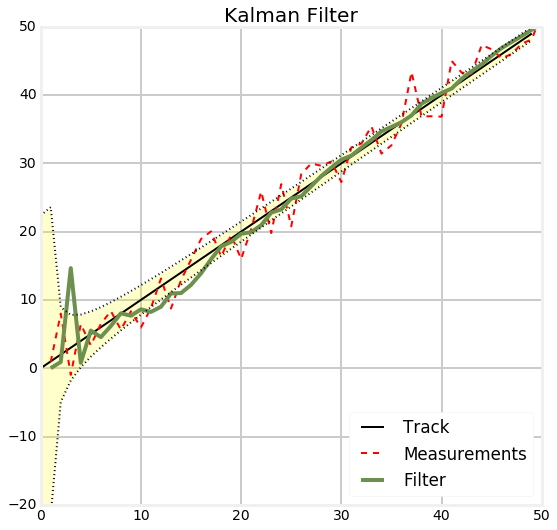

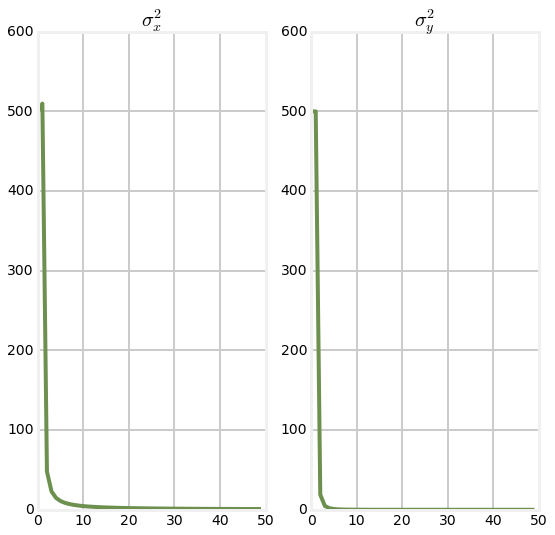

In [31]:
plot_track(noise_var=10, R_var=10, Q_var=0.01, count=50, y_lim=(-20,50))

* The first plot plots the output of the Kalman filter against the measurements and the actual position of the vehicle (drawn in green). 

* After the initial settling in period the filter should track the vehicle's position very closely. 

* The yellow shaded portion between the black dotted lines shows 1 standard deviations of the filter's variance

* The next two plots show the variance of $x$ and of $\dot{x}$, the diagonals of $\mathbf{P}$ over time.  $\mathbf{P}[0,0]$ is the variance of $x$, and $\mathbf{P}[1,1]$ is the variance of $\dot{x}$. 

* Despite initializing $\mathbf{P}=(\begin{smallmatrix}500&0\\0&500\end{smallmatrix})$, the output quickly converges to small variances for both the position and velocity. The covariance matrix $\mathbf{P}$ tells us the *theoretical* performance of the filter *assuming* everything we tell it is true. 

> Recall from the Gaussian chapter that the standard deviation is the square root of the variance, and that approximately 68% of a Gaussian distribution occurs within one standard deviation. Therefore, if at least 68% of the filter output is within one standard deviation we can be sure that the filter is performing well. In the top chart I have displayed the one standard deviation as the yellow shaded area between the two dotted lines. It looks like perhaps the filter is slightly exceeding that bounds, so the filter probably needs some tuning.

### Compare to Univariate Kalman Filter

* Implement a simple 1-D kalman filter using the the univariate Kalman filter, and compare its output to the above kalman filter by plotting it

* Use a simple model of tracking an object that starts at x=0 and moves by 1 at each step. We will assume the arbitrary value 5 for the measurement noise and .02 for the process noise.

Recall that the univariate equations for the update step are:
$$
\begin{aligned}
\mu &=\frac{\sigma_1^2 \mu_2 + \sigma_2^2 \mu_1} {\sigma_1^2 + \sigma_2^2}, \\
\sigma^2 &= \frac{1}{\frac{1}{\sigma_1^2} + \frac{1}{\sigma_2^2}}
\end{aligned}
$$

and that the 1-D equations for the predict step are:
$$
\begin{aligned}
\mu &= \mu_1+\mu_2, \\ \sigma^2 &= \sigma_1^2 + \sigma_2^2
\end{aligned}
$$

In [32]:
# 1-D Kalman filter equations
def predict(pos, variance, movement, movement_variance):
    return (pos + movement, variance + movement_variance)

def update (mu1, var1, mu2, var2):
    mean = (var1*mu2 + var2*mu1) / (var1+var2)
    variance = 1 / (1/var1 + 1/var2)
    return (mean, variance)

In [33]:
#from filterpy.kalman import KalmanFilter

def mkf_filter(R, Q):
    f = KalmanFilter(dim_x=1, dim_z=1, dim_u=1)
    f.P = 500.
    f.H = np.array([[1.]])
    f.F = np.array([[1.]])
    f.B = np.array([[1.]])
    f.Q = Q
    f.R = R
    
    return f

* Plot the data from the 1-D Kalman filter as a blue line, and the output of the filter from this chapter as red dots

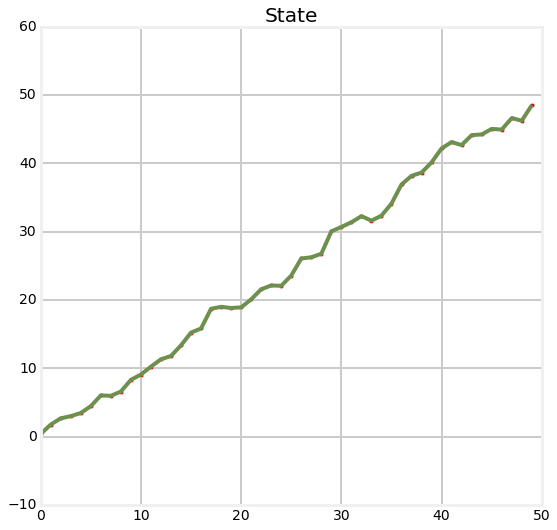

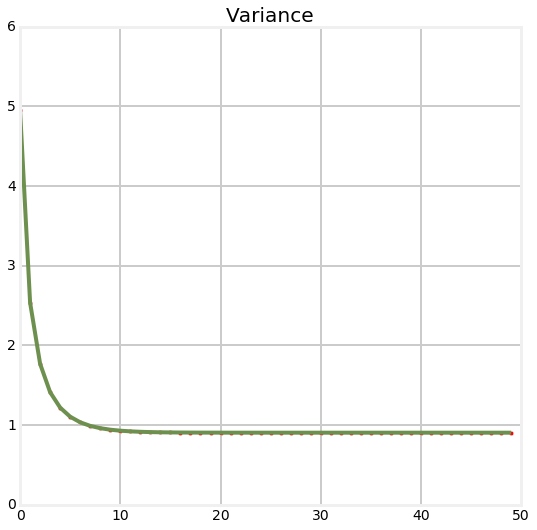

In [34]:
from numpy.random import randn

# Compare by plotting
def plot_kf_compare(x0, p0, R, Q, move):
    # storage for filter output
    x1,x2 = [], []
    p1, p2 = [], []

    # initialize the filters
    f = mkf_filter(R, Q)
    f.x[0] = 0.
    f.P = p0
    pos = (x0, p0)
    for i in range(50):
        z = i*move + randn()
        pos = update(pos[0], pos[1], z, R)
        f.update(z)

        x1.append(pos[0])
        x2.append(f.x[0])

        p1.append(pos[1])
        p2.append(f.P[0, 0])

        u = move + randn()
        pos = predict(pos[0], pos[1], u, Q)
        f.predict(u=u)

    plt.scatter(range(len(x2)), x2, c='r')
    plt.title('State')
    plt.plot(x1)
    plt.xlim([0, 50])

    plt.figure()
    plt.plot(p1)
    plt.scatter(range(len(x2)), p2, c='r')
    plt.title('Variance')
    plt.xlim([0, 50])
    plt.show()
    
plot_kf_compare(x0=0., p0=500., R=5., Q=.2, move=1.)

* Both filters produce the same results. This is a solid demonstration, albeit not a rigorous proof, that both filters in fact implement the same math for the 1-D case. 

### Compare to a Filter That Incorporates Velocity

* Uses the state $\mathbf{x}=\begin{bmatrix}x & \dot{x}\end{bmatrix}^\mathsf{T}$ and compare it against the filter which used the state $\mathbf{x}=\begin{bmatrix}x\end{bmatrix}$.

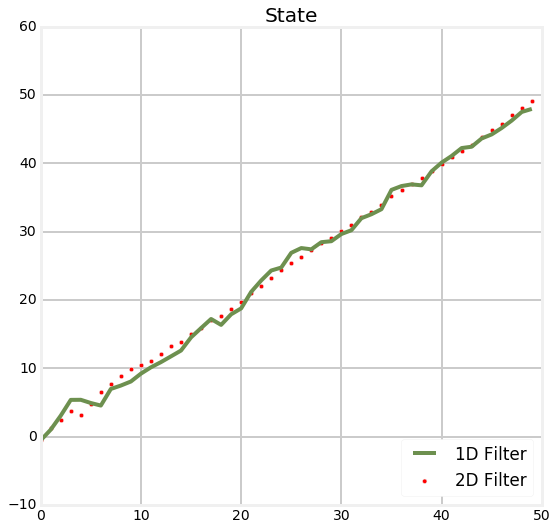

In [35]:
def pos_vel_filter(R,Q):
    f = KalmanFilter(dim_x=2, dim_z=1)
    f.R = R
    f.Q = Q_discrete_white_noise(dim=2, dt=0.1, var=Q)
   
    f.F = np.array([[1, 1],
                    [0, 1]])  # state transition matrix
    f.H = np.array([[1, 0]])  # Measurement function
    return f

def plot_compare_pos_vel(x0, p0, R, Q, move):
    # storage for filter output
    x1, x2 = [], []

    # initialize the filters
    f1 = mkf_filter(R, Q)
    f1.x[0] = 0.
    #f1.P[0, 0] = p0
    f1.P = p0
    
    f2 = pos_vel_filter(R, Q)
    f2.x[0] = 0.
    f2.x[1] = 1.
    f2.P *= p0
    
    for i in range(50):
        u = move + randn()
        f1.predict(u=u)
        f2.predict(u=u)
        
        z = i*move + randn()
        f1.update(z)
        f2.update(z)
        
        x1.append(f1.x[0, 0])
        x2.append(f2.x[0, 0])

    plt.plot(x1, label='1D Filter')
    plt.scatter(range(len(x2)), x2, c='r', label='2D Filter')
    plt.title('State')
    plt.legend(loc=4)
    plt.xlim([0,50])
    plt.show()
    
plot_compare_pos_vel(x0=0., p0=500., R=5., Q=.2, move=1.)    

* The output of the filter that incorporates velocity into the state produces much better output than the filter that only tracks position - the output is much closer to a straight line.